In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Генерацмя выборки

In [2]:
def gen(n, mean_1, mean_2):
    x_1=norm.rvs(size=n, loc=mean_1, scale=0.5)
    x_1=np.append(x_1, norm.rvs(size=n, loc=mean_2, scale=0.5))
    x_2=norm.rvs(size=n, loc=mean_1, scale=0.5)
    x_2=np.append(x_2, norm.rvs(size=n, loc=mean_2, scale=0.5))
    return(x_1, x_2)

In [3]:
x_1, x_2 = gen(20, 2 , 3)

In [4]:
X=np.array([x_1, x_2])
y=np.repeat([-1,1], 20)

Text(0, 0.5, '$x_2$')

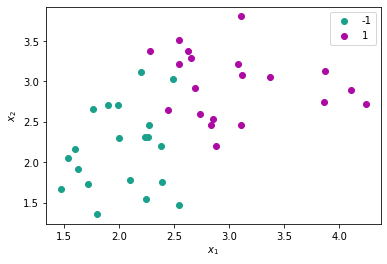

In [8]:
fig, ax = plt.subplots()
ax.scatter(x_1[:20], x_2[:20], c = [[0.1, 0.63, 0.55]], label='-1')
ax.scatter(x_1[20:], x_2[20:], c = '#ad09a3', label='1')
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Обычный перцептрон

In [6]:
class Perceptron():
    
    def __init__(self, eta=0.1, n_iter=100):
        self.eta = 0.01
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[0])
        self.errors = []
        
        for _ in range(self.n_iter):
            errors = 0
            for i in range(X.shape[1]):
                delta_w = self.eta * (y[i] - self.predict(X[:,i]))
                self.w[1:] += delta_w * X[:,i]
                self.w[0] += delta_w
                errors += int(delta_w !=0)
            self.errors.append(errors)
        
    def f(self, X):
        return(np.dot(self.w[1:],X) + self.w[0])
    
    def predict(self, X):
        return(np.where(self.f(X) >= 0, 1, -1))
        


In [10]:
model = Perceptron()

In [11]:
model.fit(X,y)

In [12]:
xx1=np.linspace(x_1.min()-1, x_1.max()+1, 1000)
xx2=np.linspace(x_2.min()-1, x_2.max()+1, 1000)
XX=np.array([xx1, xx2])
XX

array([[0.47392698, 0.47869487, 0.48346276, ..., 5.22751402, 5.23228191,
        5.2370498 ],
       [0.35792241, 0.36237246, 0.36682251, ..., 4.79462251, 4.79907256,
        4.80352261]])

In [17]:
model.w

array([-0.7       ,  0.25181047,  0.06601514])

In [14]:
yy=[]
for x1 in XX[0]:
    for x2 in XX[1]:
        if model.predict([x1,x2]) == 1:
            yy.append([x1,x2])
            break

In [15]:
yy=np.array(yy[:800]).T

Text(0, 0.5, '$x_2$')

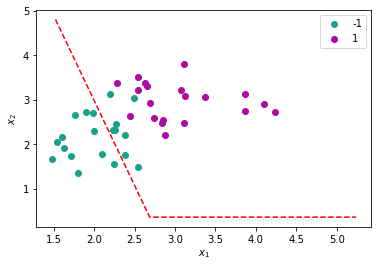

In [16]:
fig, ax = plt.subplots()
ax.scatter(x_1[:20], x_2[:20], c = [[0.1, 0.63, 0.55]], label='-1')
ax.scatter(x_1[20:], x_2[20:], c = '#ad09a3', label='1')
ax.legend()
plt.plot(yy[0],yy[1], linestyle = '--', c='red')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# ADALIN

$$J= {1\over 2} \sum(y_i-y_p)^2={1\over 2} \sum(y_i-\omega_2 x_2-\omega_1 x_1-\omega_0)^2$$

$$\Delta \omega _j = -\eta \bigtriangledown J(\omega)$$

$$\Delta \omega _2 = -\eta {\delta J \over \delta \omega_2}=\eta \sum(y_i-\omega_2 x_2-\omega_1 x_1-\omega_0)x_2$$

$$\Delta \omega _1 = -\eta {\delta J \over \delta \omega_1}=\eta \sum(y_i-\omega_2 x_2-\omega_1 x_1-\omega_0)x_1$$

In [6]:
class Adalin():
    
    def __init__(self, eta=0.01, n_iter=1000):
        self.eta = 0.001
        self.n_iter=n_iter
    
    def fit(self, X, y):
        self.w=np.zeros(1+X.shape[0])
        
        for i in range(self.n_iter):
            self.w[1:] += self.eta*(y-self.f(X)).dot(X.T)
            self.w[0] += self.eta*(y-self.f(X)).sum()
    
    def f(self, X):
        return(np.dot(self.w[1:],X)+self.w[0])
    
    
    def activation(self, X):
        return self.f(X)
    
    def predict(self, X):
        return np.where(self.activation(X)>=0, 1, -1)

$$\begin{pmatrix}
x_{11}&x_{21}\\
x_{12}&x_{22}\\
...&...\\
x_{1n}&x_{2n}
\end{pmatrix} 
\times
\begin{pmatrix}
\omega_1\\
\omega_2\\
\end{pmatrix}
=
\begin{pmatrix}
x_{11}\omega_1+x_{21}\omega_2\\
x_{12}\omega_1+x_{22}\omega_2\\
...\\
x_{1n}\omega_1+x_{2n}\omega_2\\
\end{pmatrix} 
$$

$$
\begin{pmatrix}
x_{11}&x_{12}&...&x_{1n}\\
x_{21}&x_{22}&...&x_{2n}\\
\end{pmatrix} 
\times
\begin{pmatrix}
y_1\\
y_2\\
...\\
y_n
\end{pmatrix}
=
\begin{pmatrix}
x_{11}y_1+x_{12}y_2+...+x_{1n}y_n\\
x_{21}y_1+x_{22}y_2+...+x_{2n}y_n\\
\end{pmatrix}
$$


In [7]:
pidr=Adalin()

In [8]:
pidr.fit(X,y)

In [9]:
xx1=np.linspace(x_1.min()-1, x_1.max()+1, 1000)
xx2=np.linspace(x_2.min()-1, x_2.max()+1, 1000)
XX=np.array([xx1, xx2])
XX

array([[-0.17952463, -0.1741734 , -0.16882218, ...,  5.15564797,
         5.1609992 ,  5.16635043],
       [ 0.01849872,  0.02323291,  0.02796709, ...,  4.73848488,
         4.74321907,  4.74795326]])

In [10]:
yy=[]
for x1 in XX[0]:
    for x2 in XX[1]:
        if pidr.predict([x1,x2]) == 1:
            yy.append([x1,x2])
            break
yy=np.array(yy[:800]).T

Text(0, 0.5, '$x_2$')

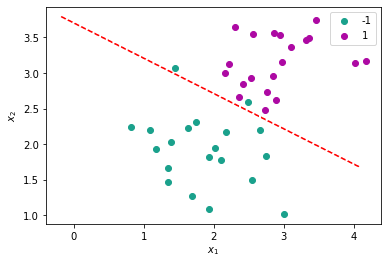

In [11]:
fig, ax = plt.subplots()
ax.scatter(x_1[:20], x_2[:20], c = [[0.1, 0.63, 0.55]], label='-1')
ax.scatter(x_1[20:], x_2[20:], c = '#ad09a3', label='1')
ax.legend()
plt.plot(yy[0],yy[1], linestyle = '--', c='red')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Logistic Regressor + L-2 reg

$$J= \sum[(y^{(i)}log(activation)+(1-y^{(i)})log(1-activation)]$$

$$J={1\over l} \sum log[1+e^{-y_i(\omega_1 x_1 + \omega_2 x_2 + \omega_0)}] + {1\over 2}C||w||^2$$

$$\Delta \omega _j = \eta \bigtriangledown J(\omega)$$

$${\delta J \over \delta \omega_2}={1\over l} \sum y_i x_2[1-{1\over1+e^{-y_i(\omega_1 x_1 + \omega_2 x_2 + \omega_0)}}]-C \omega_2$$

In [117]:
class LogReg():
    
    def __init__(self, eta=0.01, n_iter=1000, C=0.001):
        self.eta = eta
        self.n_iter=n_iter
        self.C=C
    
    def fit(self, X, y):
        self.w=np.zeros(1+X.shape[0])
        
        for i in range(self.n_iter):
            self.w[1:] += X.shape[1]*self.eta*(X*y).dot(self.activation(X,y))# - self.eta*self.C*self.w[1:]
            self.w[0] += X.shape[1]*self.eta*y.dot(self.activation(X,y))# - self.eta*self.C*self.w[0]
    
    def f(self, X):
        return(np.dot(self.w[1:],X)+self.w[0])
    
    def activation(self, X, y):
        return 1-(1/(1+np.exp(-self.f(X)*y)))
    
    def sigm(self, X):
        return 1/(1+np.exp(-self.f(X)))
    
    def predict(self, X):
        return np.where(self.sigm(X)>=0.5, 1, 0)

$$
\begin{pmatrix}
x_{11}y_1&x_{12}y_2&...&x_{1n}y_n\\
x_{21}y_1&x_{22}y_2&...&x_{2n}y_n\\
\end{pmatrix} 
\times
\begin{pmatrix}
sig_1\\
sig_2\\
...\\
sig_n
\end{pmatrix}
=
\begin{pmatrix}
x_{11}y_1sig_1+x_{12}y_2sig_2+...+x_{1n}y_nsig_n\\
x_{21}y_1sig_1+x_{22}y_2sig_2+...+x_{2n}y_nsig_n\\
\end{pmatrix}
$$


In [118]:
clf=LogReg()

In [119]:
clf.fit(X,y)

In [120]:
clf.predict(X)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [121]:
yy=[]
for x1 in XX[0]:
    for x2 in XX[1]:
        if clf.predict([x1,x2]) == 1:
            yy.append([x1,x2])
            break
yy=np.array(yy[:800]).T

Text(0, 0.5, '$x_2$')

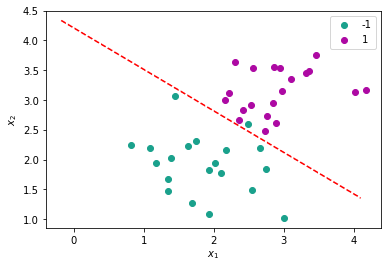

In [122]:
fig, ax = plt.subplots()
ax.scatter(x_1[:20], x_2[:20], c = [[0.1, 0.63, 0.55]], label='-1')
ax.scatter(x_1[20:], x_2[20:], c = '#ad09a3', label='1')
ax.legend()
plt.plot(yy[0],yy[1], linestyle = '--', c='red')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

In [86]:
clf.predict(X).sum()

<ipython-input-80-6952960cdec0>:22: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-self.f(X)))


20

# Ядерная оценка плотности

In [36]:
x=np.array([norm.rvs(40, 10, 100), norm.rvs(70, 10, 100)]).ravel()

In [37]:
def create_hist(x, width):
    a=np.linspace(x.min(), x.max(), width)
    m=[]
    for i in range(len(a)-1):
        s=[]
        for j in x:
            if j > a[i] and j <=a[i+1]:
                s.append(j)
        m.append(s)
    hist_y=list(map(len, m))
    hist_x=[]
    for i in range(len(a)-1):
        hist_x.append((a[i]+a[i+1])/2)
    return(hist_x, hist_y)

In [73]:
hist_x, hist_y = create_hist(x, 10)

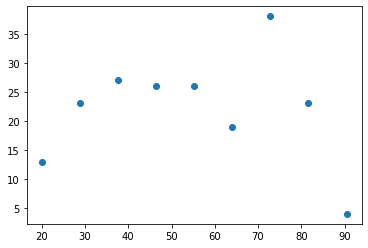

In [74]:
plt.scatter(hist_x, hist_y)

In [86]:
def hist(x, sd):
    xx=np.linspace(x.min(), x.max(), len(x))
    hist=np.zeros(len(x))
    for x_,n in zip(hist_x,hist_y):
        yy=(xx-x_)**2
        a=0.7*np.exp(-yy/sd)*n
        plt.plot(xx, a)
        hist+=a
    plt.plot(xx, hist, '--')

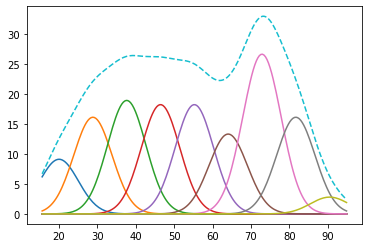

In [87]:
hist(x, 50)

In [41]:
x = 5
b = 3
lam = 10
w = np.linspace(-2, 2, 100)
y1 = 0.5*(w*x-b)**2
y2 = lam*abs(w)

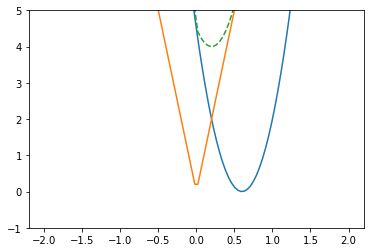

In [42]:
plt.ylim([-1, 5])
plt.plot(w, y1)
plt.plot(w, y2)
plt.plot(w, y1+y2, '--')